**Questions for EDA**

● What is the most important factor in determining survival of the Titanic incident?

● In the movie, the upper-class passengers were given preference on
lifeboats. Does this show in the data?

● “Women and children first”. Was this the case?

● Add one other observation that you have noted in the dataset.

In [55]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import minmax_scaling
import missingno

from sklearn.preprocessing import LabelEncoder

titanic_df = pd.read_csv('Titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
print('Total number of rows is:', titanic_df.shape[0])
missing_values = titanic_df.isnull().sum()

print (missing_values)

Total number of rows is: 891
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
# Majority of the cabin values are missing. Will remove column.
titanic_df.drop('Cabin',axis=1, inplace=True)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Possible characteristics linked to survival on the Titanic.
- Pclass
- Sex - Not numeric - Need to encode
- Age

In [128]:
# Encode Sex to use in analysis - 1 = Male, 0 = Female
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Sex - Survivability')

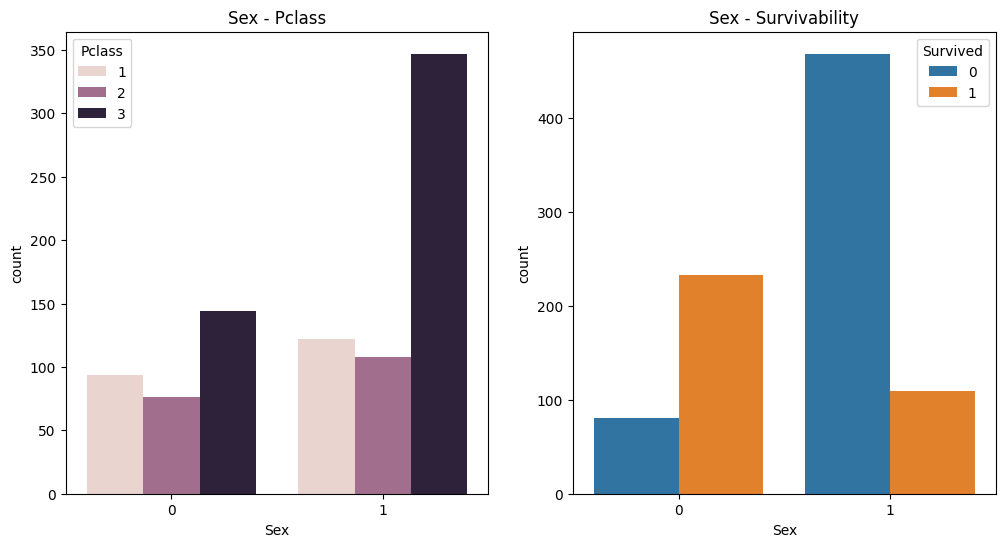

In [163]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(ax=axes[0],data=titanic_df, x='Sex', hue='Pclass')
axes[0].set_title('Sex - Pclass')

sns.countplot(ax=axes[1],data=titanic_df, x='Sex', hue='Survived' )
axes[1].set_title('Sex - Survivability')

Nealry 2x males to females on the ship 
Pclass 3 largest class of passenger.

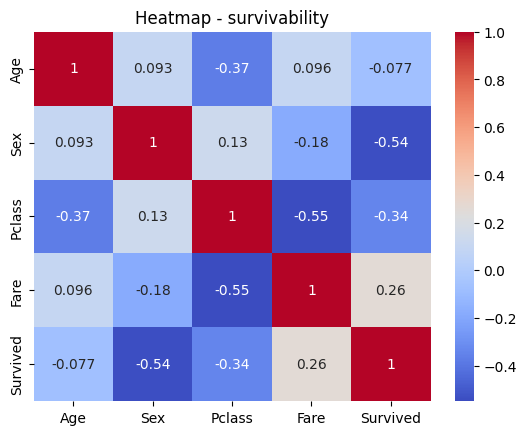

In [126]:
corr_columns = ['Age', 'Sex', 'Pclass', 'Fare', 'Survived']
corr_data = titanic_df[corr_columns]
corr_matrix = corr_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap - survivability')
plt.show()

Correlations based on heatmap: 

Sex and survivability - Moderate negative -0.54

Pclass and surviavbility - Low negative -0.34

Age and survivability - poor negative -0.077

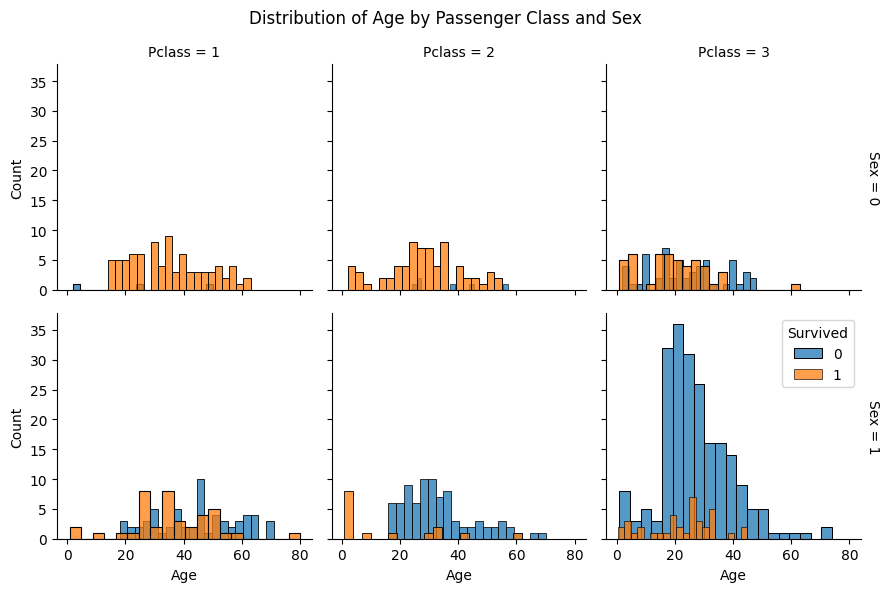

In [117]:
# Facet grid.
g = sns.FacetGrid(titanic_df, row='Sex', col='Pclass', margin_titles=True, hue='Survived')
g.map(sns.histplot, 'Age', bins=20)
g.set_axis_labels('Age', 'Count')
g.fig.suptitle('Distribution of Age by Passenger Class and Sex')
plt.legend(title='Survived', loc='upper right')

plt.tight_layout()
plt.show()

Based on the Facet grid we can see the breakdown of survivability 1 = survived, 0 = died.
Pclass - less survivability in class 3.

Age - Less clear relationship. Very few deaths age < 20.

Sex - Greater proportion of Male pasengers died.

Can start to look at impact of Pclass and Sex.

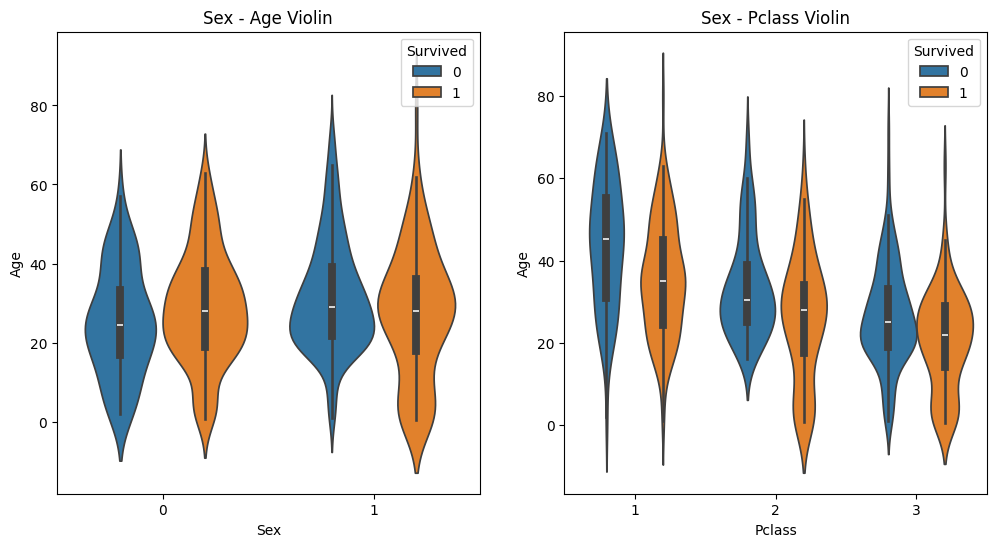

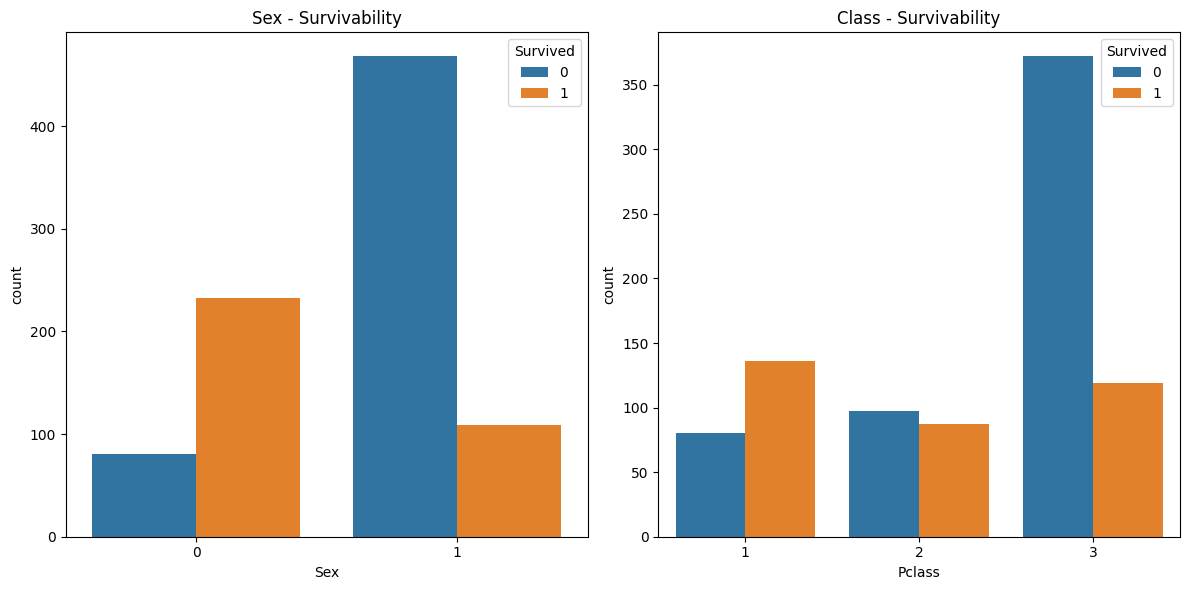

In [185]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.violinplot(ax=axes[0],data=titanic_df, x='Sex', y='Age', hue='Survived')
axes[0].set_title('Sex - Age Violin')

sns.violinplot(ax=axes[1],data=titanic_df, x='Pclass', y='Age', hue='Survived')
axes[1].set_title('Sex - Pclass Violin')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(ax=axes[0],data=titanic_df, x='Sex', hue='Survived' )
axes[0].set_title('Sex - Survivability')

sns.countplot(ax=axes[1],data=titanic_df, x='Pclass', hue='Survived' )
axes[1].set_title('Class - Survivability')

plt.tight_layout()
plt.show()


Based on analysis: 

Most important factors on survival is the Sex of passenger. Male passengers most likely to die. Especially as class of passengers decreases. 

Upper class passengers given preference - 
A greater number of Pclass1 passengers survived compared to class 2 and 3
More women survived across class 1 and 2. The age of Pclass 1 survivors was higher than Pclass 3 though.


Women and children first - Violin plots suggest that children up to around 15 had a higher survivavbility across all Pclass, frequency of died increases above this. Sex-Survivability histogram shows that more Males died, as suggested by corrolation matrix (-0.54). Women and children were more likely to survive. 


One thing I have noted from the data is that Pclass 3 was largely younger Males with a median age of 22. They showed the highest proportion of fatalities, being both Male and in Pclass 3.

